[View in Colaboratory](https://colab.research.google.com/github/raahatg21/MNIST-Dataset-using-TensorFlow/blob/master/3_ConvNet.ipynb)

# MNIST Dataset: ConvNets

Classification on MNIST Dataset using Convolution Neural Networks in TensorFlow.Test Accuracy: 99.04%.

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [40]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
eta = 0.01
epochs = 50
batch_size = 128
dropout = 0.8

In [0]:
# Defining the placeholders

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
dp = tf.placeholder(tf.float32)  # Why not a variable?

In [0]:
# Defining Convolution and Pooling functions

def conv2d(X, w, b, strides = 1):
  X = tf.nn.conv2d(X, w, strides = [1, strides, strides, 1], padding = 'SAME')
  X = tf.nn.bias_add(X, b)
  return tf.nn.relu(X)

def maxpool2d(X, k = 2):
  return tf.nn.max_pool(X, ksize = [1, k, k, 1], strides = [1, k, k, 1], padding = 'SAME')

In [0]:
# Defining the model

def conv_net(X, w, b, dp): #dropout
  X = tf.reshape(X, shape = [-1, 28, 28, 1])
  
  conv_1 = conv2d(X, weights['c1'], biases['c1'])
  conv_1 = maxpool2d(conv_1)
  
  conv_2 = conv2d(conv_1, weights['c2'], biases['c2'])
  conv_2 = maxpool2d(conv_2)
  
  flatten = tf.reshape(conv_2, shape = [-1, weights['d1'].get_shape().as_list()[0]])
  
  fc1 = tf.matmul(flatten, weights['d1']) + biases['d1']
  fc1 = tf.nn.relu(fc1)
  fc1 = tf.nn.dropout(fc1, dropout)
  
  out = tf.matmul(fc1, weights['d2']) + biases['d2']
  return out

In [0]:
weights = {'c1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
           'c2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
           'd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
           'd2': tf.Variable(tf.random_normal([1024, 10]))}

biases = {'c1': tf.Variable(tf.random_normal([32])),
          'c2': tf.Variable(tf.random_normal([64])),
          'd1': tf.Variable(tf.random_normal([1024])),
          'd2': tf.Variable(tf.random_normal([10]))}

In [0]:
y_hat = conv_net(X, weights, biases, dp)  # dropout

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = y_hat, labels = Y))

optimizer = tf.train.AdamOptimizer(learning_rate = eta).minimize(loss)

correct_pred = tf.equal(tf.argmax(y_hat, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variables_initializer()

In [47]:
train_loss = []
train_acc = []
test_acc = []

with tf.Session() as sess:
  sess.run(init)
  for epoch in range(epochs):
    epoch_loss = 0
    epoch_acc = 0
    batches = int(mnist.train.num_examples/batch_size)
    for i in range(batches):
      batch_X, batch_Y = mnist.train.next_batch(batch_size)
      # print(batch_X.shape, batch_Y.shape)
      _, l, a = sess.run([optimizer, loss, accuracy], feed_dict = {X: batch_X, Y: batch_Y, dp: dropout}) #dropout
      epoch_loss += l
      epoch_acc += a
    epoch_loss /= batches
    epoch_acc /= batches
    print("Epoch {0}: Training Loss {1}, Training Accuracy {2}".format(epoch, epoch_loss, epoch_acc))
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    _, a2 = sess.run([optimizer, accuracy], feed_dict = {X: mnist.test.images, Y: mnist.test.labels, dp: 1})  #dropout
    print("Epoch {0}: Testing Accuracy {1}".format(epoch, a2))
    test_acc.append(a2)

Epoch 0: Training Loss 2281.7912673772353, Training Accuracy 0.8902607808857809
Epoch 0: Testing Accuracy 0.9451000094413757
Epoch 1: Training Loss 78.31144524356979, Training Accuracy 0.9611013986013986
Epoch 1: Testing Accuracy 0.9645000100135803
Epoch 2: Training Loss 44.79966860954891, Training Accuracy 0.9719369172494172
Epoch 2: Testing Accuracy 0.9708999991416931
Epoch 3: Training Loss 29.504573247371574, Training Accuracy 0.9787478146853147
Epoch 3: Testing Accuracy 0.9707000255584717
Epoch 4: Training Loss 20.941409847156528, Training Accuracy 0.9830091783216783
Epoch 4: Testing Accuracy 0.9695000052452087
Epoch 5: Training Loss 16.46530943174601, Training Accuracy 0.9858500874125874
Epoch 5: Testing Accuracy 0.974399983882904
Epoch 6: Training Loss 12.308987396613535, Training Accuracy 0.9873798076923077
Epoch 6: Testing Accuracy 0.9764999747276306
Epoch 7: Training Loss 12.426893009903981, Training Accuracy 0.9881993006993007
Epoch 7: Testing Accuracy 0.9765999913215637
Epoc

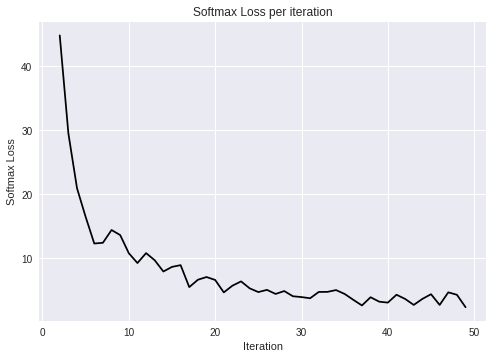

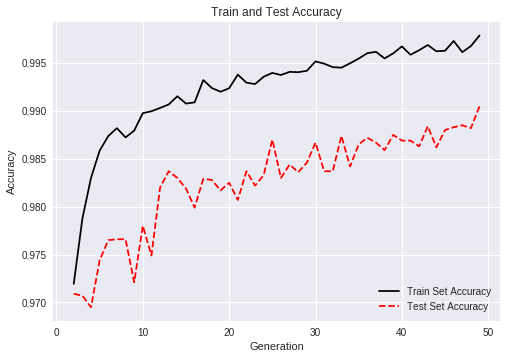

In [49]:
eval_indices = range(2, epochs)

# Plot loss over time
plt.plot(eval_indices, train_loss[2:], 'k-')
plt.title('Softmax Loss per iteration')
plt.xlabel('Iteration')
plt.ylabel('Softmax Loss')
plt.show()

# Plot train and test accuracy
plt.plot(eval_indices, train_acc[2:], 'k-', label='Train Set Accuracy')
plt.plot(eval_indices, test_acc[2:], 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()